In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
# from readTSP import *

In [2]:
def initializeAnts(cities, colony):
    start_positions = np.random.choice(cities.shape[0], colony, replace=True)
    return start_positions

In [3]:
def inverseDistances(cities):
    distances = np.sqrt(((cities[:, np.newaxis, :] - cities[np.newaxis, :, :]) ** 2).sum(axis=2))
    np.fill_diagonal(distances, np.inf)
    inv_distances = 1 / distances
    return inv_distances

In [4]:
def moveAnts(cities, positions, inv_distances, pheromones, alpha, beta, del_tau):
    num_cities = cities.shape[0]
    paths = np.zeros((num_cities, positions.shape[0]), dtype=int) - 1

    # Initial position at node zero
    paths[0] = positions

    for node in range(1, num_cities):
        for ant in range(positions.shape[0]):
            # Calculate the probability to move to the next city
            probabilities = ((inv_distances[positions[ant]] ** alpha) * 
                             (pheromones[positions[ant]] ** beta))
            
            # Set already visited cities' probabilities to 0
            visited = paths[:, ant]
            probabilities[visited[visited >= 0]] = 0

            # Normalize probabilities
            if probabilities.sum() == 0:
                probabilities = np.ones_like(probabilities)
            probabilities /= probabilities.sum()

            # Choose next city based on probabilities
            next_position = np.random.choice(range(num_cities), p=probabilities)

            # Add node to path
            paths[node, ant] = next_position

            # Update pheromones locally
            pheromones[positions[ant], next_position] += del_tau

            # Move to next position
            positions[ant] = next_position

    return np.swapaxes(paths, 0, 1)


In [5]:
def runAcoTsp(cities, iterations=80, colony=50, alpha=1.0, beta=1.0, del_tau=1.0, rho=0.5):
    inv_distances = inverseDistances(cities)
    
    # Initialize pheromones
    pheromones = np.ones((cities.shape[0], cities.shape[0])) # Start with some pheromone

    min_distance = np.inf
    min_path = None

    for i in range(iterations):
        positions = initializeAnts(cities, colony)
        paths = moveAnts(cities, positions, inv_distances, pheromones, alpha, beta, del_tau)

        pheromones *= (1 - rho) # Evaporate pheromones globally

        # Evaluate paths
        for path in paths:
            distance = 0
            for node in range(1, path.shape[0]):
                distance += np.sqrt(((cities[path[node]] - cities[path[node - 1]]) ** 2).sum())

            # Update global pheromones for best path
            if distance < min_distance:
                min_distance = distance
                min_path = path

    min_path = np.append(min_path, min_path[0])

    return min_path, min_distance

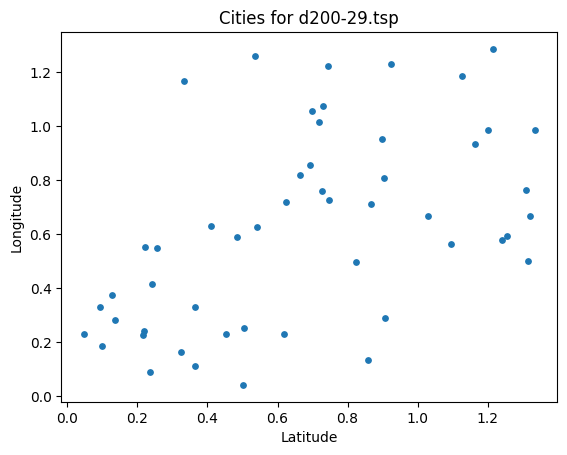

Colony: 5, Min Distance: 8.552877265751327
Colony: 10, Min Distance: 8.284932013303086
Colony: 15, Min Distance: 8.328578834980805
Colony: 20, Min Distance: 7.409314710492424
Colony: 25, Min Distance: 7.897440738499612
Colony: 30, Min Distance: 6.981806977662819
Colony: 35, Min Distance: 7.352173266856111
Colony: 40, Min Distance: 7.071787427674676
Colony: 45, Min Distance: 6.726148974835339
Colony: 50, Min Distance: 7.387207517697122
Colony: 55, Min Distance: 7.101535421420289
Colony: 60, Min Distance: 7.3338790584566445
Colony: 65, Min Distance: 7.333869769797725
Colony: 70, Min Distance: 7.361424782372627
Colony: 75, Min Distance: 6.914255477630464
Colony: 80, Min Distance: 6.896782049624658
Colony: 85, Min Distance: 7.21232151257494
Colony: 90, Min Distance: 7.107837611260034
Colony: 95, Min Distance: 6.951980529398379
Colony: 100, Min Distance: 7.268901877899592
Alpha: 0.1, Min Distance: 17.410465172050667
Alpha: 0.2, Min Distance: 14.332562643526554
Alpha: 0.3, Min Distance: 12.0

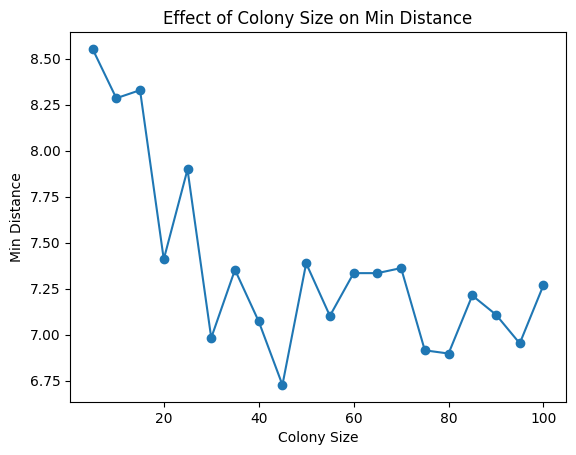

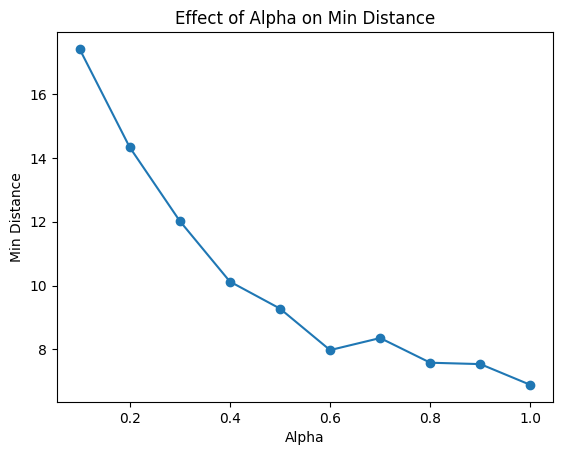

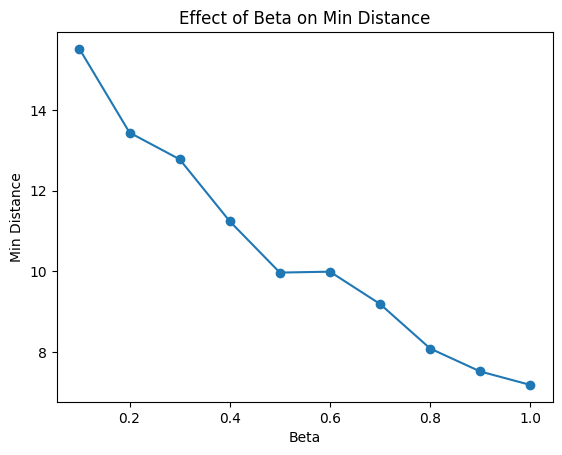

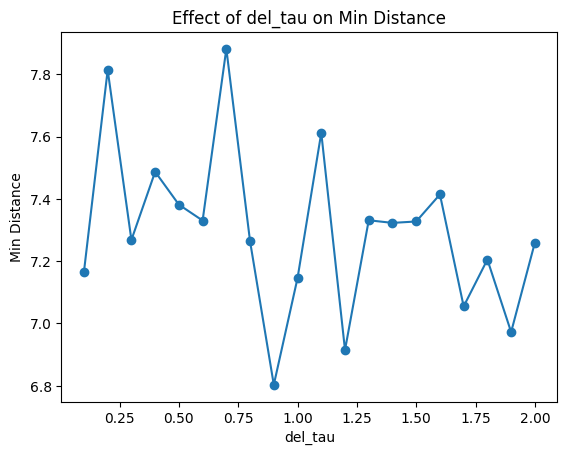

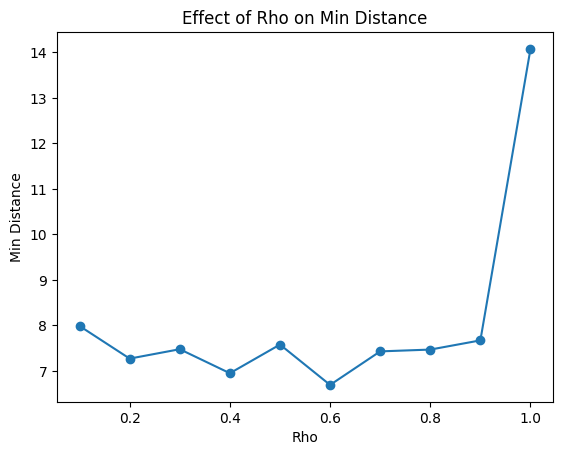

Minimal Colony Size: 45
Minimal Alpha: 1
Minimal Beta: 1
Minimal del_tau: 0.9
Minimal Rho: 0.6


In [6]:
# Read data
# TSP = getTspData('d200-29.tsp')
# displayTspHeaders(TSP)
# cities = np.array(TSP['node_coord_section'])
cities = []
with open('d200-29.tsp') as f:
    reader = csv.reader(f, delimiter=" ")
    for i, row in enumerate(reader):
        if i>50:
            break
        row1 = (float(row[0]), float(row[2]))
        cities.append(row1)
cities = np.array(cities)

# Plot
plt.scatter(cities[:, 0], cities[:, 1], s = 15)
plt.title('Cities for {}'.format('d200-29.tsp'))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
plt.close()

# ACO Parameters
iterations = 50
colony = 50
alpha = 0.6
beta = 1
del_tau = 1
rho = 0.1

colony_values = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
alpha_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
beta_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
del_tau_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
rho_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Vars
n = 2         # Run ACO this many times
average = 0 

def run_experiment(cities, iterations, colony, alpha, beta, del_tau, rho):
    min_path, min_distance = runAcoTsp(cities, iterations, colony, alpha, beta, del_tau, rho)
    return min_distance

# Experiment with different values of colony
colony_results = []
for colony in colony_values:
    min_distance = run_experiment(cities, iterations, colony, alpha=1, beta=1, del_tau=1.5, rho=0.5)
    colony_results.append((colony, min_distance))
    print(f'Colony: {colony}, Min Distance: {min_distance}')

# Find the minimal colony size
min_colony = min(colony_results, key=lambda x: x[1])[0]

# Experiment with different values of alpha using the minimal colony size
alpha_results = []
for alpha in alpha_values:
    min_distance = run_experiment(cities, iterations, colony=min_colony, alpha=alpha, beta=1, del_tau=1.5, rho=0.5)
    alpha_results.append((alpha, min_distance))
    print(f'Alpha: {alpha}, Min Distance: {min_distance}')

# Find the minimal alpha value
min_alpha = min(alpha_results, key=lambda x: x[1])[0]

# Experiment with different values of beta using the minimal colony size and alpha value
beta_results = []
for beta in beta_values:
    min_distance = run_experiment(cities, iterations, colony=min_colony, alpha=min_alpha, beta=beta, del_tau=1.5, rho=0.5)
    beta_results.append((beta, min_distance))
    print(f'Beta: {beta}, Min Distance: {min_distance}')

# Find the minimal beta value
min_beta = min(beta_results, key=lambda x: x[1])[0]

# Experiment with different values of del_tau using the minimal colony size, alpha value, and beta value
del_tau_results = []
for del_tau in del_tau_values:
    min_distance = run_experiment(cities, iterations, colony=min_colony, alpha=min_alpha, beta=min_beta, del_tau=del_tau, rho=0.5)
    del_tau_results.append((del_tau, min_distance))
    print(f'del_tau: {del_tau}, Min Distance: {min_distance}')

# Find the minimal del_tau value
min_del_tau = min(del_tau_results, key=lambda x: x[1])[0]

# Experiment with different values of rho using the minimal colony size, alpha value, beta value, and del_tau value
rho_results = []
for rho in rho_values:
    min_distance = run_experiment(cities, iterations, colony=min_colony, alpha=min_alpha, beta=min_beta, del_tau=min_del_tau, rho=rho)
    rho_results.append((rho, min_distance))
    print(f'Rho: {rho}, Min Distance: {min_distance}')

# Find the minimal rho value
min_rho = min(rho_results, key=lambda x: x[1])[0]

# Plot results for each parameter
def plot_results(results, parameter_name):
    x, y = zip(*results)
    plt.plot(x, y, marker='o')
    plt.title(f'Effect of {parameter_name} on Min Distance')
    plt.xlabel(parameter_name)
    plt.ylabel('Min Distance')
    plt.show()

plot_results(colony_results, 'Colony Size')
plot_results(alpha_results, 'Alpha')
plot_results(beta_results, 'Beta')
plot_results(del_tau_results, 'del_tau')
plot_results(rho_results, 'Rho')

print(f'Minimal Colony Size: {min_colony}')
print(f'Minimal Alpha: {min_alpha}')
print(f'Minimal Beta: {min_beta}')
print(f'Minimal del_tau: {min_del_tau}')
print(f'Minimal Rho: {min_rho}')


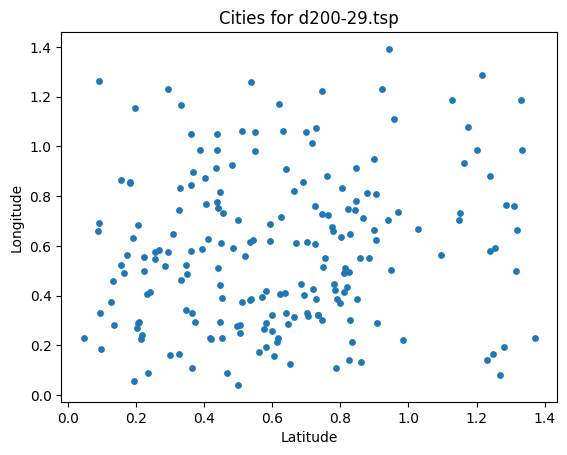

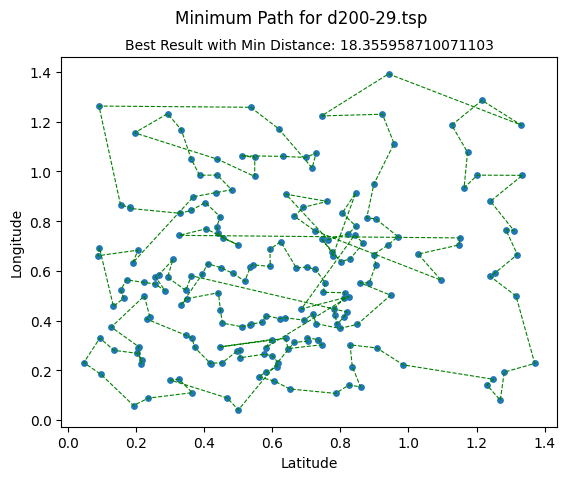

Minimum Distance: 18.355958710071103


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Read data
cities = []
with open('d200-29.tsp') as f:
    reader = csv.reader(f, delimiter=" ")
    for i, row in enumerate(reader):
        row1 = (float(row[0]), float(row[2]))
        cities.append(row1)
cities = np.array(cities)

# Plot cities
plt.scatter(cities[:, 0], cities[:, 1], s=15)
plt.title('Cities for {}'.format('d200-29.tsp'))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
plt.close()

# Best ACO Parameters
iterations = 50
colony = 75
alpha = 0.9
beta = 1
del_tau = 0.9
rho = 0.5

# Run ACO with the best parameters
min_path, min_distance = runAcoTsp(cities, iterations, colony, alpha, beta, del_tau, rho)

# Plot the best solution
plt.scatter(cities[:, 0], cities[:, 1], marker='o', s=15)
plt.plot(cities[min_path, 0], cities[min_path, 1], c='g', linewidth=0.8, linestyle="--")
plt.suptitle('Minimum Path for {}'.format('d200-29.tsp'))
plt.title('Best Result with Min Distance: {}'.format(min_distance), fontsize=10)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
plt.close()

# Print the minimum distance
print('Minimum Distance: {}'.format(min_distance))

What are the effects of the heuristic strength on the quality of solutions obtained from
ACO? Give some plausible reasons to support your observations.

Heuristic strength is the alpha. it controls the influence of the heuristic information when an ant chooses the next city to visit. When alpha is high, the ants are more likely to choose paths based on the heuristic. you can see the evidence from the image the notebook generate. The higher the alpha, the lower the minimal distance.

What are the effects of the pheromone evaporation rate on the quality of the
solutions obtained from ACO? Give some plausible reasons to support your
observations

Pheromone evaporation rate is the rho. It controls how quickly the pheromone trails evaporate. A high evaporation rate means pheromones evaporate quickly, reducing the influence of past paths, while a low evaporation rate means pheromones linger longer. The lower the rho, the lower the minimal distance.

Compare the best results you have obtained using GA and ACO. Comment on your
findings.

Base on my best result, i would say ACO got better result. My GA's result is 27 and my ACO's result is 18.